<a href="https://colab.research.google.com/github/rohandawar/deeplearning_titanic/blob/main/Learning_Tensorflow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Tensorflow
Example #1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers

In [2]:
#fetching the data
dftrain_raw = pd.read_csv('https://raw.githubusercontent.com/rohandawar/eat_tensorflow2_in_30_days/master/data/titanic/train.csv')
dftest_raw = pd.read_csv('https://raw.githubusercontent.com/rohandawar/eat_tensorflow2_in_30_days/master/data/titanic/test.csv')

In [3]:
dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


In [4]:
dftest_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
1,405,0,3,"Oreskovic, Miss. Marija",female,20.00,0,0,315096,8.6625,NaN,S
2,635,0,3,"Skoog, Miss. Mabel",female,9.00,3,2,347088,27.9000,NaN,S
3,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C
4,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C


Introduction of each field：

* Survived: 0 for death and 1 for survived [y labels]
* Pclass: Class of the tickets, with three possible values (1,2,3)[converting to one-hot encoding]
* Name: Name of each passenger [discarded]
* Sex: Gender of each passenger [converting to bool type]
* Age: Age of each passenger (partly missing) [numerical feature, should add "Whether age is missing" as auxiliary feature]
* SibSp: Number of siblings and spouse of each passenger (interger) [numerical feature]
* Parch: Number of parents/children of each passenger (interger) [numerical feature]
* Ticket: Ticket number (string) [discarded]
* Fare: Ticket price of each passenger (float, between 0 to 500) [numerical feature]
* Cabin: Cabin where each passenger is located (partly missing) [should add "Whether cabin is missing" as auxiliary feature]
* Embarked: Which port was each passenger embarked, possible values are S、C、Q (partly missing) [converting to one-hot encoding, four dimensions, S,C,Q,nan]

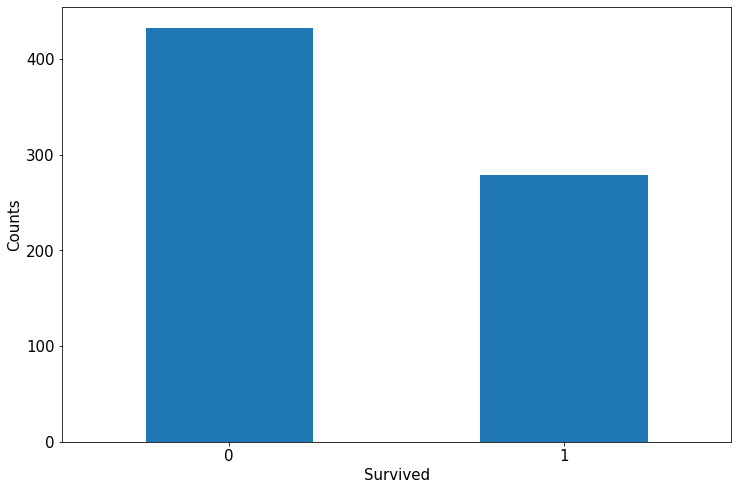

In [5]:
#checking the distribution for the target variable
ax = dftrain_raw['Survived'].value_counts().plot(kind = 'bar', 
                                                 figsize = (12,8), 
                                                 fontsize = 15, 
                                                 rot =0)
ax.set_ylabel('Counts', fontsize = 15)
ax.set_xlabel('Survived', fontsize = 15)
plt.show()

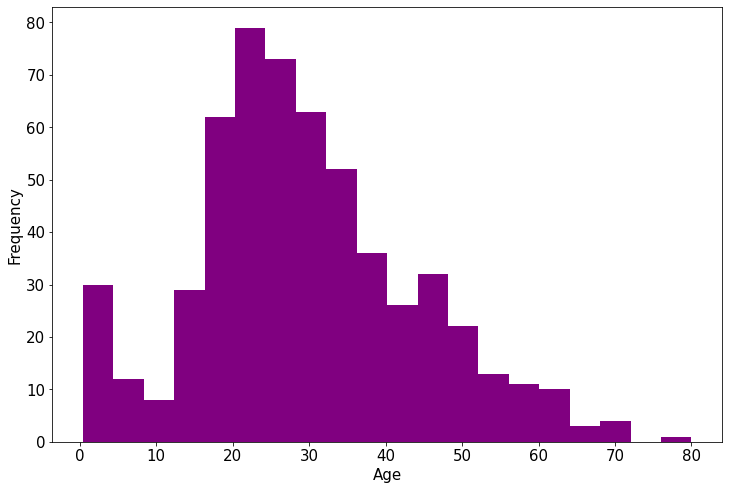

In [6]:
#Age Distribution
ax = dftrain_raw['Age'].plot(kind = 'hist',
                             bins = 20,
                             color = 'purple',
                             figsize = (12,8),
                           fontsize =15)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_xlabel('Age', fontsize = 15)
plt.show()

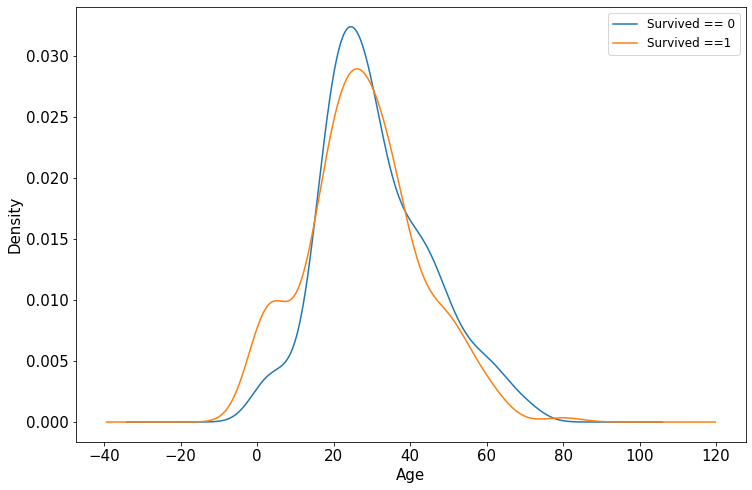

In [7]:
#Co-relation between age & survival (find out why the age is negative)
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density',
                                                    figsize = (12,8),
                                                    fontsize = 15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density',
                                               figsize = (12,8),
                                               fontsize = 15)
ax.legend(['Survived == 0', 'Survived ==1'], fontsize = 12)
ax.set_ylabel('Density', fontsize = 15)
ax.set_xlabel('Age', fontsize = 15)
plt.show()

In [8]:
def data_investigation(df):
  print('Number of Persons: ', df.shape[0])
  print('Number of Variables: ', df.shape[1])
  print('-'*20)
  print('Dataset Columns: \n')
  print(df.columns)
  print('-'*20)
  print('Datatype of eack column: \n')
  print(df.dtypes)
  print('-'*20)
  print('Missing rows in each columns: \n')
  c = df.isnull().sum()
  print(c[c>0])
  print('-'*20)
  print('Missing Value %age vise: \n')
  print(100*(df.isnull().sum()/len(df.index)))
  print('-'*20)
  print('Pictorial Representation of missing Values: ')
  plt.figure(figsize=(8,6))
  sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')
  plt.show()



Number of Persons:  712
Number of Variables:  12
--------------------
Dataset Columns: 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
--------------------
Datatype of eack column: 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
--------------------
Missing rows in each columns: 

Age         146
Cabin       544
Embarked      2
dtype: int64
--------------------
Missing Value %age vise: 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.505618
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin   

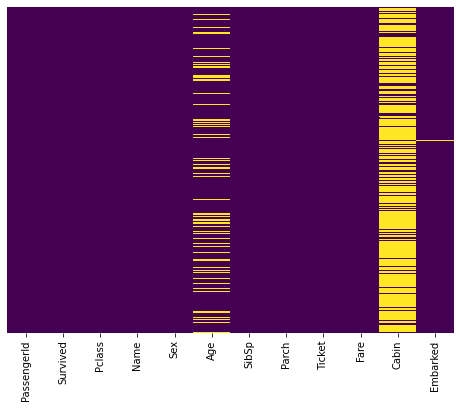

In [9]:
#Data investigation for Train
data_investigation(dftrain_raw)

Number of Persons:  179
Number of Variables:  12
--------------------
Dataset Columns: 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
--------------------
Datatype of eack column: 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
--------------------
Missing rows in each columns: 

Age       31
Cabin    143
dtype: int64
--------------------
Missing Value %age vise: 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            17.318436
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          79.888268
Embar

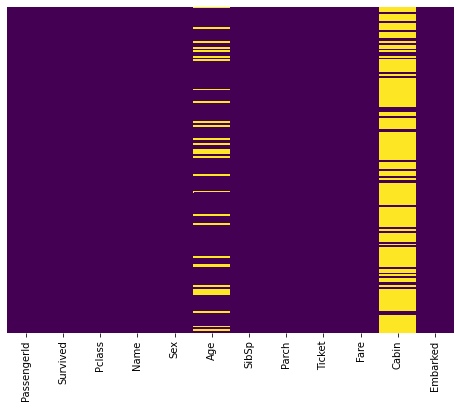

In [10]:
#data investigation for test
data_investigation(dftest_raw)

## Missing Value treatment

*Since we have 76% & 79% values missing in the Cabin column in test & train respectively, dropping those.*

In [11]:
dftrain_raw.drop('Cabin', axis = 1, inplace=True)
dftest_raw.drop('Cabin', axis =1, inplace=True)

In [12]:
# To handle the missing values for age, I plan to extract the title & use the same to impute the missing values.

#combine the df
train_test_df = [dftrain_raw, dftest_raw]

In [13]:
#using a loop so that the extraction runs twice
for data in train_test_df:
  data['Tittle'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [14]:
dftest_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tittle
0,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,S,Miss
1,405,0,3,"Oreskovic, Miss. Marija",female,20.00,0,0,315096,8.6625,S,Miss
2,635,0,3,"Skoog, Miss. Mabel",female,9.00,3,2,347088,27.9000,S,Miss
3,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C,Mrs
4,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C,Miss


In [15]:
dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tittle
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,S,Mr
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C,Mrs
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,S,Miss
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,S,Mr
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,S,Mr


In [16]:
dftrain_raw.groupby('Tittle')['Age'].mean()

Tittle
Capt        70.000000
Col         60.000000
Countess    33.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.071111
Miss        22.141304
Mlle        24.000000
Mme         24.000000
Mr          32.392628
Mrs         35.337079
Ms          28.000000
Rev         40.400000
Sir         49.000000
Name: Age, dtype: float64

In [17]:
#filling the missing values by median age for each tittle(Mr, Miss, etc)
dftrain_raw['Age'].fillna(dftrain_raw.groupby('Tittle')['Age'].transform('mean'), inplace=True)
dftest_raw['Age'].fillna(dftest_raw.groupby('Tittle')['Age'].transform('median'), inplace=True)

Number of Persons:  712
Number of Variables:  12
--------------------
Dataset Columns: 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Tittle'],
      dtype='object')
--------------------
Datatype of eack column: 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Tittle          object
dtype: object
--------------------
Missing rows in each columns: 

Embarked    2
dtype: int64
--------------------
Missing Value %age vise: 

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.280899
Tittle         0.000000
dty

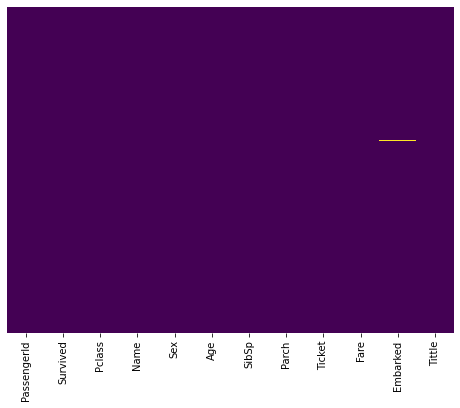

In [18]:
#checking the train data
data_investigation(dftrain_raw)

Number of Persons:  179
Number of Variables:  12
--------------------
Dataset Columns: 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Tittle'],
      dtype='object')
--------------------
Datatype of eack column: 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Tittle          object
dtype: object
--------------------
Missing rows in each columns: 

Age    1
dtype: int64
--------------------
Missing Value %age vise: 

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.558659
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.000000
Tittle         0.000000
dtype: f

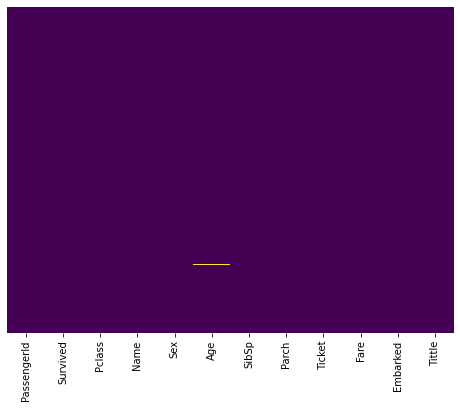

In [19]:
data_investigation(dftest_raw)

Number of Persons:  710
Number of Variables:  12
--------------------
Dataset Columns: 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Tittle'],
      dtype='object')
--------------------
Datatype of eack column: 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Tittle          object
dtype: object
--------------------
Missing rows in each columns: 

Series([], dtype: int64)
--------------------
Missing Value %age vise: 

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Tittle         0.0
dtype: float64
--------------------
Pictorial Representation of m

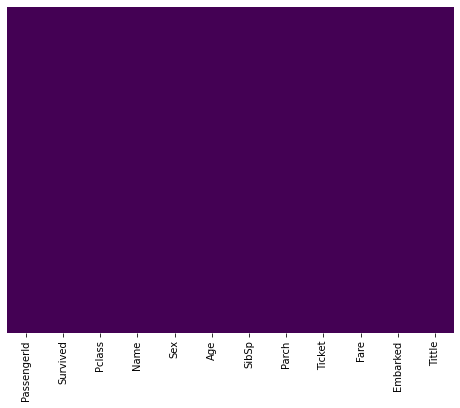

In [20]:
#dropping the missing value in train data
dftrain_raw.dropna(inplace=True)
data_investigation(dftrain_raw)

Number of Persons:  179
Number of Variables:  12
--------------------
Dataset Columns: 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Tittle'],
      dtype='object')
--------------------
Datatype of eack column: 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Tittle          object
dtype: object
--------------------
Missing rows in each columns: 

Series([], dtype: int64)
--------------------
Missing Value %age vise: 

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Tittle         0.0
dtype: float64
--------------------
Pictorial Representation of m

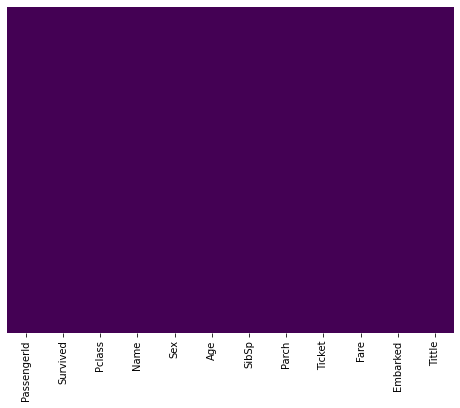

In [21]:
#It seems some age data is empty in the test data so imputing those.
dftest_raw.fillna(dftest_raw.mean(), inplace=True)
data_investigation(dftest_raw)

*Now, the data is clean, we would move to preprocessing of the data*

## Data Preprocessing

In [22]:
dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tittle
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,S,Mr
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C,Mrs
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,S,Miss
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,S,Mr
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,S,Mr


In [23]:
dftest_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tittle
0,181,0,3,"Sage, Miss. Constance Gladys",female,18.00,8,2,CA. 2343,69.5500,S,Miss
1,405,0,3,"Oreskovic, Miss. Marija",female,20.00,0,0,315096,8.6625,S,Miss
2,635,0,3,"Skoog, Miss. Mabel",female,9.00,3,2,347088,27.9000,S,Miss
3,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C,Mrs
4,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C,Miss


In [27]:
#dropping name & ticket & tittle as they are not required for modelling
dftrain_raw.drop(['Name', 'Ticket', 'Tittle'], axis= 1, inplace=True)
dftest_raw.drop(['Name', 'Ticket', 'Tittle'], axis= 1, inplace=True)

In [28]:
dftrain_raw.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,493,0,1,male,55.0,0,0,30.5000,S
1,53,1,1,female,49.0,1,0,76.7292,C
2,388,1,2,female,36.0,0,0,13.0000,S
3,192,0,2,male,19.0,0,0,13.0000,S
4,687,0,3,male,14.0,4,1,39.6875,S


In [29]:
dftest_raw.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,181,0,3,female,18.00,8,2,69.5500,S
1,405,0,3,female,20.00,0,0,8.6625,S
2,635,0,3,female,9.00,3,2,27.9000,S
3,701,1,1,female,18.00,1,0,227.5250,C
4,470,1,3,female,0.75,2,1,19.2583,C


In [30]:
train_categorical = dftrain_raw.select_dtypes(include = 'object')
test_categorical = dftrain_raw.select_dtypes(include = 'object')

In [32]:
train_categorical.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,male,S
4,male,S


In [33]:
test_categorical.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,male,S
4,male,S


In [35]:
train_categorical_dummies = pd.get_dummies(train_categorical, drop_first=True)
train_categorical_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,1,0,1
4,1,0,1


In [36]:
test_categorical_dummies = pd.get_dummies(test_categorical, drop_first=True)
test_categorical_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,1,0,1
4,1,0,1


In [37]:
#merging the columns back
train = pd.concat([dftrain_raw, train_categorical_dummies], axis = 1)
test = pd.concat([dftest_raw, test_categorical_dummies], axis =1)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,493,0,1,male,55.0,0,0,30.5000,S,1,0,1
1,53,1,1,female,49.0,1,0,76.7292,C,0,0,0
2,388,1,2,female,36.0,0,0,13.0000,S,0,0,1
3,192,0,2,male,19.0,0,0,13.0000,S,1,0,1
4,687,0,3,male,14.0,4,1,39.6875,S,1,0,1


In [39]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,181.0,0.0,3.0,female,18.00,8.0,2.0,69.5500,S,1,0,1
1,405.0,0.0,3.0,female,20.00,0.0,0.0,8.6625,S,0,0,0
2,635.0,0.0,3.0,female,9.00,3.0,2.0,27.9000,S,0,0,1
3,701.0,1.0,1.0,female,18.00,1.0,0.0,227.5250,C,1,0,1
4,470.0,1.0,3.0,female,0.75,2.0,1.0,19.2583,C,1,0,1


In [40]:
train.drop(['Sex', 'Embarked' ], axis =1, inplace = True)
test.drop(['Sex', 'Embarked' ], axis =1, inplace = True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,493,0,1,55.0,0,0,30.5000,1,0,1
1,53,1,1,49.0,1,0,76.7292,0,0,0
2,388,1,2,36.0,0,0,13.0000,0,0,1
3,192,0,2,19.0,0,0,13.0000,1,0,1
4,687,0,3,14.0,4,1,39.6875,1,0,1


In [42]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,181.0,0.0,3.0,18.00,8.0,2.0,69.5500,1,0,1
1,405.0,0.0,3.0,20.00,0.0,0.0,8.6625,0,0,0
2,635.0,0.0,3.0,9.00,3.0,2.0,27.9000,0,0,1
3,701.0,1.0,1.0,18.00,1.0,0.0,227.5250,1,0,1
4,470.0,1.0,3.0,0.75,2.0,1.0,19.2583,1,0,1


In [43]:
train.shape

(710, 10)

In [44]:
test.shape

(710, 10)

In [57]:
#making the target variable & dataset
X_train = train.drop(['Survived'], axis = 1)
y_train = train['Survived']
X_test = test.drop(['Survived'], axis = 1)
y_test = test['Survived']

In [74]:
test

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,181.0,0.0,3.0,18.00,8.0,2.0,69.5500,1,0,1
1,405.0,0.0,3.0,20.00,0.0,0.0,8.6625,0,0,0
2,635.0,0.0,3.0,9.00,3.0,2.0,27.9000,0,0,1
3,701.0,1.0,1.0,18.00,1.0,0.0,227.5250,1,0,1
4,470.0,1.0,3.0,0.75,2.0,1.0,19.2583,1,0,1
...,...,...,...,...,...,...,...,...,...,...
707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1


In [61]:
# model building
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20,activation = 'relu',input_shape=(9,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Model Training
#using binary cross entropy loss function for binary classification
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['AUC'])

history = model.fit(X_train, y_train,
                    batch_size = 64,
                    epochs = 30,
                    validation_split = 0.2)

Epoch 1/50
9/9 [==============================] - 1s 54ms/step - loss: 0.7531 - auc: 0.6566 - val_loss: 0.6591 - val_auc: 0.6897
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6438 - auc: 0.7086 - val_loss: 0.7282 - val_auc: 0.6623
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6475 - auc: 0.7009 - val_loss: 0.6774 - val_auc: 0.6743
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6170 - auc: 0.7420 - val_loss: 0.6363 - val_auc: 0.6913
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 0.6124 - auc: 0.7169 - val_loss: 0.6648 - val_auc: 0.6768
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5684 - auc: 0.7465 - val_loss: 0.6465 - val_auc: 0.6797
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6044 - auc: 0.7344 - val_loss: 0.6326 - val_auc: 0.6826
Epoch 8/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6236 - auc: 0.7046 - val_loss: 

In [67]:
#Model Evaluation
def plot_metric(history, metric):
  train_metrics = history.history[metric]
  val_metrics = history.history['val_' +metric]
  epochs = range(1, len(train_metrics) + 1)
  plt.plot(epochs, train_metrics, 'bo--')
  plt.plot(epochs, val_metrics, 'ro-')
  plt.title('Training And Validation' + metric)
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend(["train_"+metric, 'val_'+metric])
  plt.show()


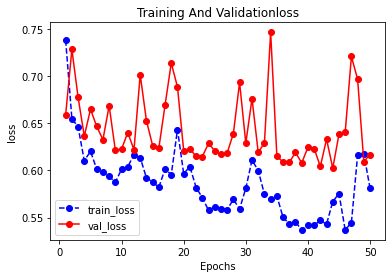

In [68]:
plot_metric(history, 'loss')

In [70]:
plot_metric(history,"AUC")

KeyError: ignored

In [71]:
model.evaluate(x = X_test, y = y_test)

 1/23 [>.............................] - ETA: 4s - loss: 0.6420 - auc: 0.7863

InvalidArgumentError: ignored